### Import The Libraries

In [1]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np



In [2]:
## ---- Load and preprocess ---- ##
df = pd.read_csv("10000 stock price data.csv")
df.shape #check the shape




(11601, 14)

In [3]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
df.head() #Check the head of the dataset

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,27-11-2007,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687720e+15,9859619,0.3612
1,28-11-2007,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312770e+14,1453278,0.3172
2,29-11-2007,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550660e+14,1069678,0.2088
3,30-11-2007,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283260e+14,1260913,0.2735
4,03-12-2007,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741


In [5]:
df.isnull().sum() #Check the missing value

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [6]:
df.drop('Series', axis=1, inplace=True)
df.drop('Prev Close', axis=1, inplace=True)
df.drop('Deliverable Volume', axis=1, inplace=True)
df.drop('%Deliverble', axis=1, inplace=True)
df.drop('VWAP', axis=1, inplace=True)
df.drop('Turnover', axis=1, inplace=True)
df.isnull().sum()


Date      0
Symbol    0
Open      0
High      0
Low       0
Last      0
Close     0
Volume    0
dtype: int64

In [7]:
df.drop('Last',axis=1,inplace=True)

In [8]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,27-11-2007,MUNDRAPORT,770.00,1050.00,770.0,962.90,27294366
1,28-11-2007,MUNDRAPORT,984.00,990.00,874.0,893.90,4581338
2,29-11-2007,MUNDRAPORT,909.00,914.75,841.0,884.20,5124121
3,30-11-2007,MUNDRAPORT,890.00,958.00,890.0,921.55,4609762
4,03-12-2007,MUNDRAPORT,939.75,995.00,922.0,969.30,2977470


In [9]:
df_symbol = df['Symbol'].unique()
df_symbol

array(['MUNDRAPORT', 'ADANIPORTS', 'TCS', 'ULTRACEMCO'], dtype=object)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df_close = df[['Close']]

### Date vs Close Price

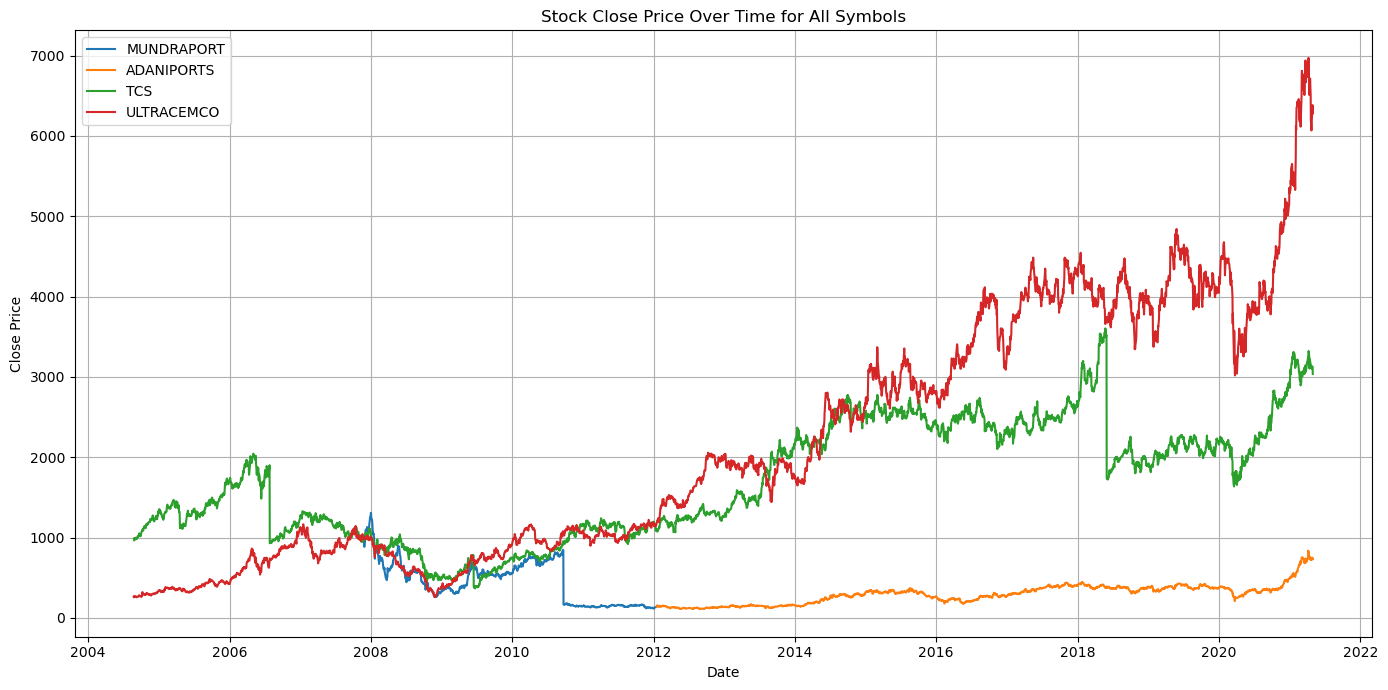

In [11]:
# Plot each symbol
plt.figure(figsize=(14, 7))

for symbol in df_symbol:
    df_symbol = df[df['Symbol'] == symbol].copy()
    df_symbol.sort_values('Date', inplace=True)
    plt.plot(df_symbol.index, df_symbol['Close'], label=symbol)

# Finalize plot
plt.title("Stock Close Price Over Time for All Symbols")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Moving avarage plot for each symbols

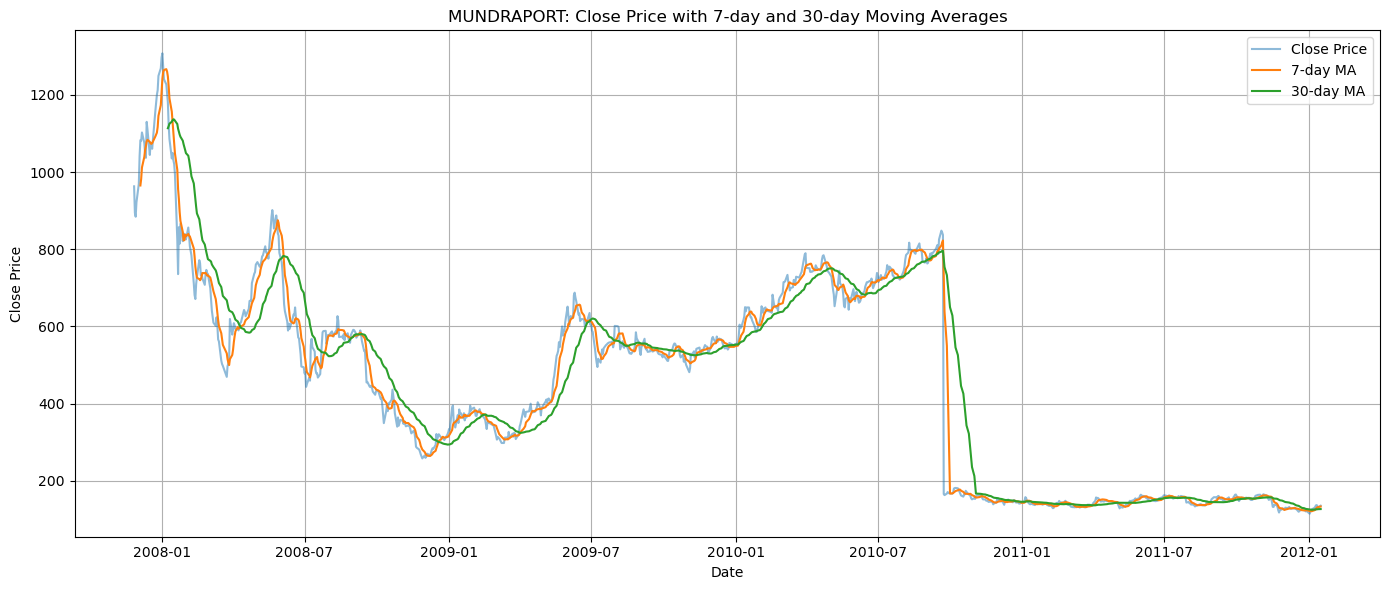

In [12]:
# MUNDRAPORT Moving Avarage plot
symbol = 'MUNDRAPORT'
df_symbol = df[df['Symbol'] == symbol].copy()

# Sort and set index
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

# STEP 3: Calculate Moving Averages
df_symbol['MA7'] = df_symbol['Close'].rolling(window=7).mean()
df_symbol['MA30'] = df_symbol['Close'].rolling(window=30).mean()

# STEP 4: Plot Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df_symbol['Close'], label='Close Price', alpha=0.5)
plt.plot(df_symbol['MA7'], label='7-day MA')
plt.plot(df_symbol['MA30'], label='30-day MA')
plt.title('MUNDRAPORT: Close Price with 7-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

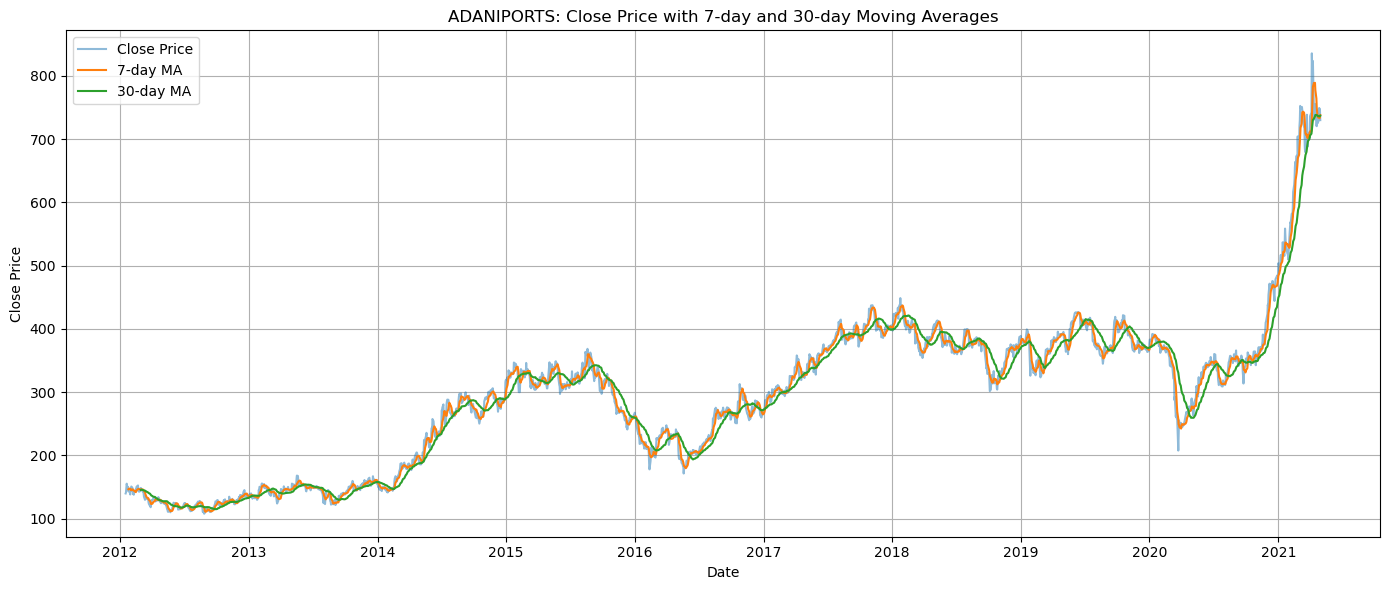

In [13]:
#ADANIPORTS Moving Avarage plot
symbol = 'ADANIPORTS'
df_symbol = df[df['Symbol'] == symbol].copy()


# Sort and set index
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

# STEP 3: Calculate Moving Averages
df_symbol['MA7'] = df_symbol['Close'].rolling(window=7).mean()
df_symbol['MA30'] = df_symbol['Close'].rolling(window=30).mean()

# STEP 4: Plot Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df_symbol['Close'], label='Close Price', alpha=0.5)
plt.plot(df_symbol['MA7'], label='7-day MA')
plt.plot(df_symbol['MA30'], label='30-day MA')
plt.title('ADANIPORTS: Close Price with 7-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

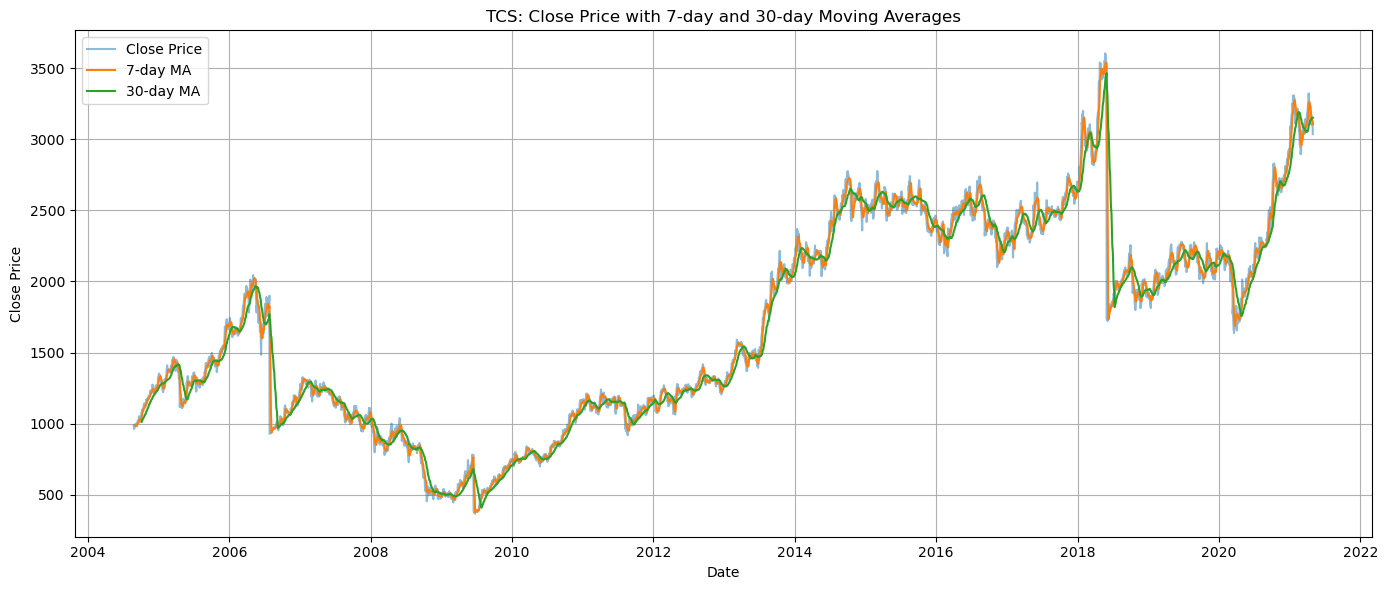

In [14]:
# TCS Moving Avarage plot
symbol = 'TCS'
df_symbol = df[df['Symbol'] == symbol].copy()
# Sort and set index
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

# STEP 3: Calculate Moving Averages
df_symbol['MA7'] = df_symbol['Close'].rolling(window=7).mean()
df_symbol['MA30'] = df_symbol['Close'].rolling(window=30).mean()

# STEP 4: Plot Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df_symbol['Close'], label='Close Price', alpha=0.5)
plt.plot(df_symbol['MA7'], label='7-day MA')
plt.plot(df_symbol['MA30'], label='30-day MA')
plt.title('TCS: Close Price with 7-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

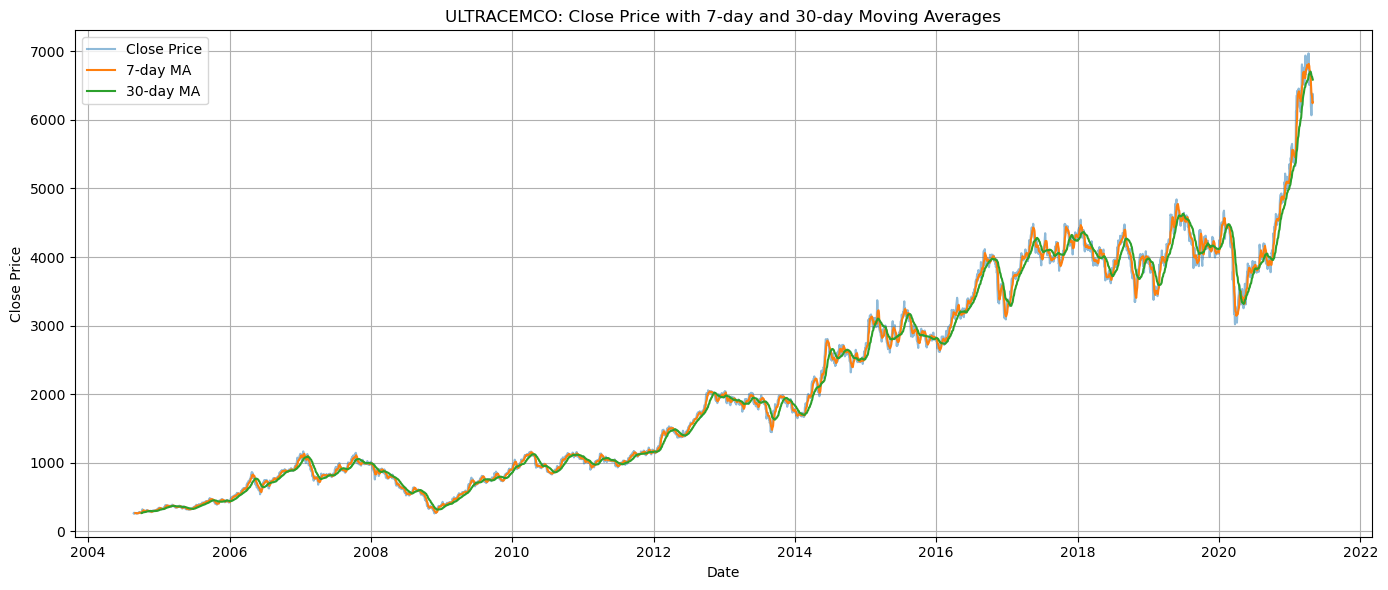

In [15]:
# ULTRACEMCO Moving Avarage plot
symbol = 'ULTRACEMCO'
df_symbol = df[df['Symbol'] == symbol].copy()

# Sort and set index
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

# STEP 3: Calculate Moving Averages
df_symbol['MA7'] = df_symbol['Close'].rolling(window=7).mean()
df_symbol['MA30'] = df_symbol['Close'].rolling(window=30).mean()

# STEP 4: Plot Moving Averages
plt.figure(figsize=(14, 6))
plt.plot(df_symbol['Close'], label='Close Price', alpha=0.5)
plt.plot(df_symbol['MA7'], label='7-day MA')
plt.plot(df_symbol['MA30'], label='30-day MA')
plt.title('ULTRACEMCO: Close Price with 7-day and 30-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
!pip install pmdarima

### ARIMA OF EVERY SYMBOLS(ADANIPORTS,MUNDRAPORT,TCS,ULTRACEMCO)

In [17]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [18]:
# Select a target symbol (e.g., 'ADANIPORTS')
symbol = 'ADANIPORTS'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)


In [19]:
# Split data into train and test
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [20]:
# Fit Auto ARIMA model
model_0= auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    m=1,  # Non-seasonal
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    seasonal=False,  # Set to True if you want SARIMA
    d=None,  # Let auto_arima determine differencing
    D=None,
    trace=True,  # Print model fitting progress
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11904.554, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11901.345, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11901.427, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11903.538, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11903.241, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11903.164, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11904.237, Time=3.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11900.437, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=11902.317, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11902.235, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11900.524, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11903.318, Time=1.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 6.841 seconds


In [21]:
# Print the best model summary
print(model_0.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1839
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -5948.219
Date:                Wed, 09 Jul 2025   AIC                          11900.437
Time:                        23:06:58   BIC                          11911.470
Sample:                             0   HQIC                         11904.506
                               - 1839                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0526      0.019     -2.809      0.005      -0.089      -0.016
sigma2        37.8871      0.669     56.643      0.000      36.576      39.198
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [22]:
# Forecast
forecast, conf_int = model_0.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [23]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower_CI': conf_int[:, 0],
    'Upper_CI': conf_int[:, 1]
}, index=test.index)

In [24]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Auto ARIMA RMSE for {symbol}: {rmse}')

Auto ARIMA RMSE for ADANIPORTS: 126.0053635486031


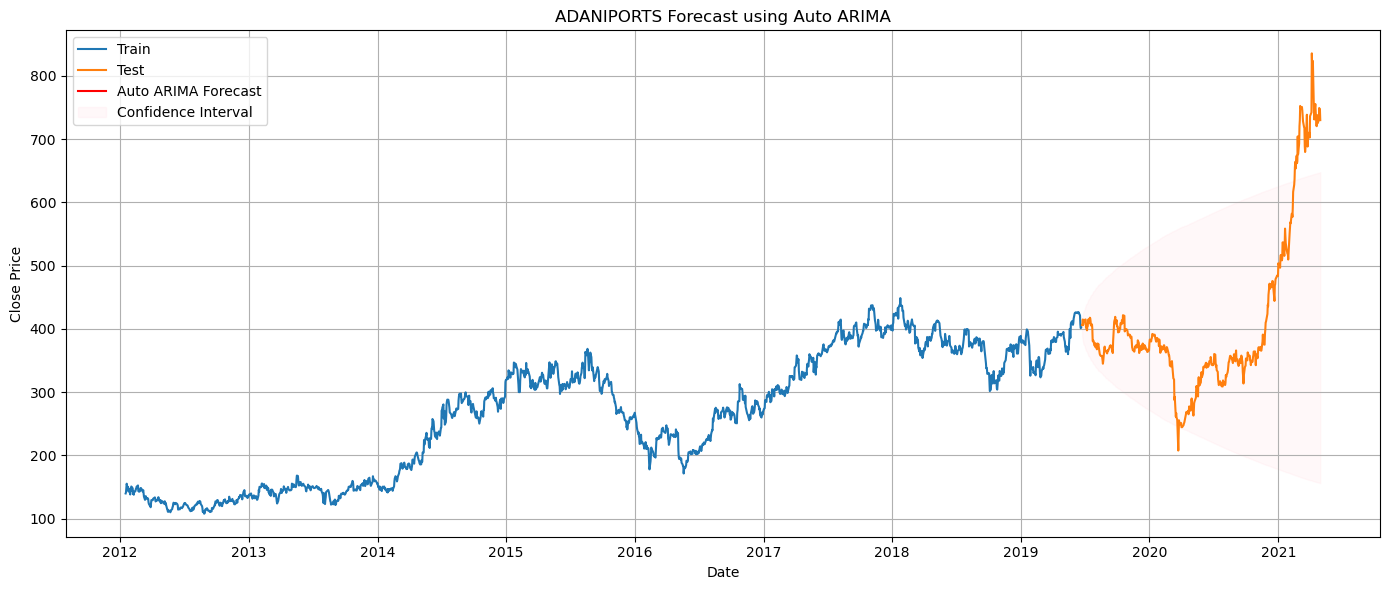

In [25]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='Auto ARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using Auto ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
## MUNDRAPORT

# Select a target symbol (e.g., 'MUNDRAPORT')
symbol = 'MUNDRAPORT'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)


In [27]:
# Split data into train and test
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [28]:
# Fit Auto ARIMA model
model_1 = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    m=1,  # Non-seasonal
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    seasonal=False,  # Set to True if you want SARIMA
    d=None,  # Let auto_arima determine differencing
    D=None,
    trace=True,  # Print model fitting progress
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7931.237, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7931.176, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7931.227, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7930.119, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7933.057, Time=0.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.252 seconds


In [29]:
# Print the best model summary
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  818
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3964.060
Date:                Wed, 09 Jul 2025   AIC                           7930.119
Time:                        23:06:59   BIC                           7934.825
Sample:                             0   HQIC                          7931.925
                                - 818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       959.1674      4.070    235.673      0.000     951.191     967.144
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):           2482110.68
Prob(Q):                              0.15   Pr

In [30]:
# Forecast
forecast, conf_int = model_1.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower_CI': conf_int[:, 0],
    'Upper_CI': conf_int[:, 1]
}, index=test.index)

In [32]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Auto ARIMA RMSE for {symbol}: {rmse}')

Auto ARIMA RMSE for MUNDRAPORT: 18.557025492302124


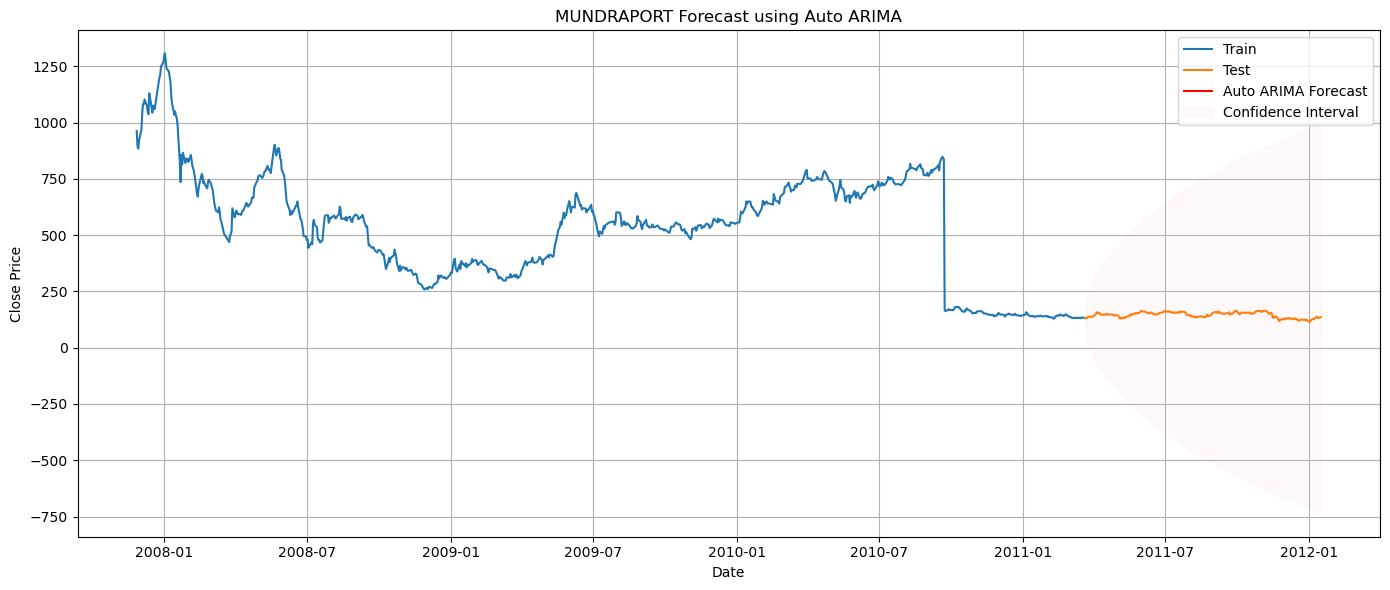

In [33]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='Auto ARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using Auto ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
## TCS
symbol = 'TCS'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [35]:
# Split data into train and test
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [36]:
# Fit Auto ARIMA model
model_2 = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    m=1,  # Non-seasonal
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    seasonal=False,  # Set to True if you want SARIMA
    d=None,  # Let auto_arima determine differencing
    D=None,
    trace=True,  # Print model fitting progress
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32457.973, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32459.864, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32459.860, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32456.709, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32455.136, Time=3.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32448.978, Time=5.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=32460.083, Time=0.70 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=32452.081, Time=4.47 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=32445.517, Time=5.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=32448.997, Time=4.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=32447.180, Time=6.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=32447.198, Time=8.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=32450.942, Time=7.06 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=32450.832, Time=8.58 sec
 ARIMA(2,1,2)(0,0,0

In [37]:
# Print the best model summary
print(model_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3311
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -16217.487
Date:                Wed, 09 Jul 2025   AIC                          32444.974
Time:                        23:08:12   BIC                          32475.497
Sample:                             0   HQIC                         32455.898
                               - 3311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0167      0.079      0.210      0.834      -0.139       0.172
ar.L2          0.8129      0.068     11.885      0.000       0.679       0.947
ma.L1         -0.0201      0.069     -0.291      0.7

In [38]:
# Forecast
forecast, conf_int = model_2.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower_CI': conf_int[:, 0],
    'Upper_CI': conf_int[:, 1]
}, index=test.index)

In [40]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Auto ARIMA RMSE for {symbol}: {rmse}')

Auto ARIMA RMSE for TCS: 537.7254429481313


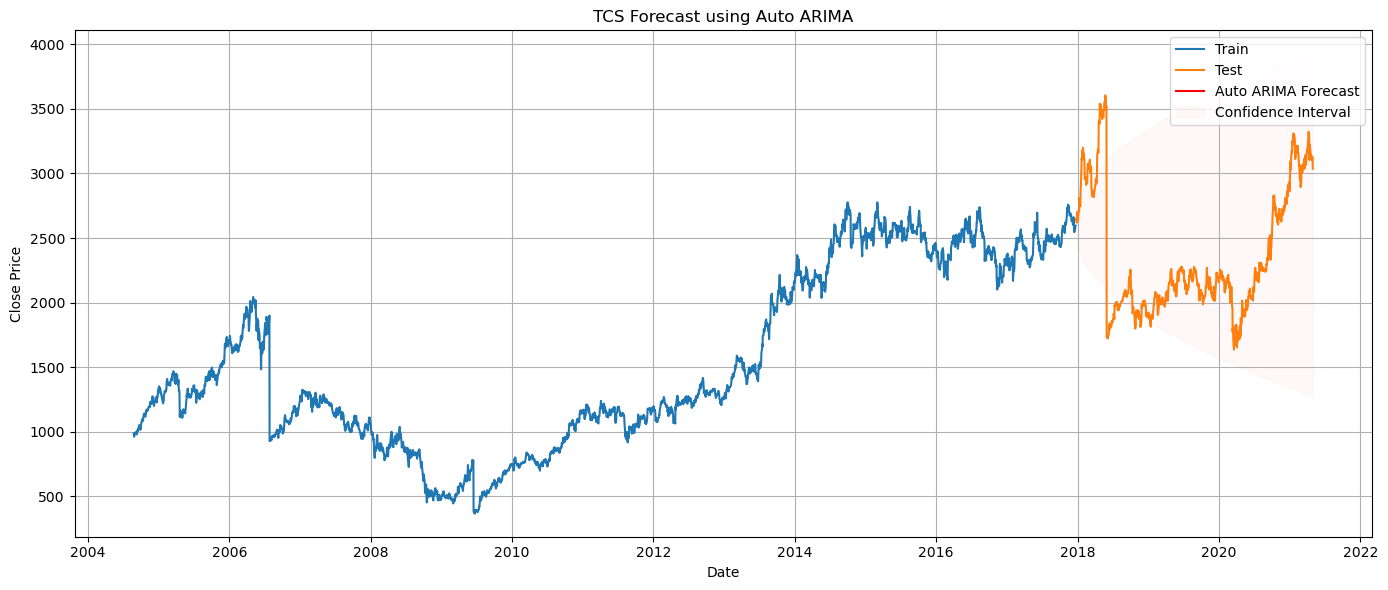

In [41]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='Auto ARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using Auto ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
## ULTRACEMCO
symbol = 'ULTRACEMCO'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [43]:
# Split data into train and test
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [44]:
# Fit Auto ARIMA model
model_3 = auto_arima(
    train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    m=1,  # Non-seasonal
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    seasonal=False,  # Set to True if you want SARIMA
    d=None,  # Let auto_arima determine differencing
    D=None,
    trace=True,  # Print model fitting progress
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32552.964, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32550.016, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32550.159, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32555.563, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=32551.371, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32551.423, Time=1.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=32553.303, Time=4.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=32552.265, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 7.295 seconds


In [45]:
# Print the best model summary
print(model_3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3312
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -16272.008
Date:                Wed, 09 Jul 2025   AIC                          32550.016
Time:                        23:08:20   BIC                          32568.331
Sample:                             0   HQIC                         32556.571
                               - 3312                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1842      0.574      2.063      0.039       0.059       2.309
ar.L1          0.0387      0.010      3.688      0.000       0.018       0.059
sigma2      1087.3233     12.976     83.796      0.0

In [46]:
# Forecast
forecast, conf_int = model_3.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower_CI': conf_int[:, 0],
    'Upper_CI': conf_int[:, 1]
}, index=test.index)

In [48]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Auto ARIMA RMSE for {symbol}: {rmse}')

Auto ARIMA RMSE for ULTRACEMCO: 844.426914842619


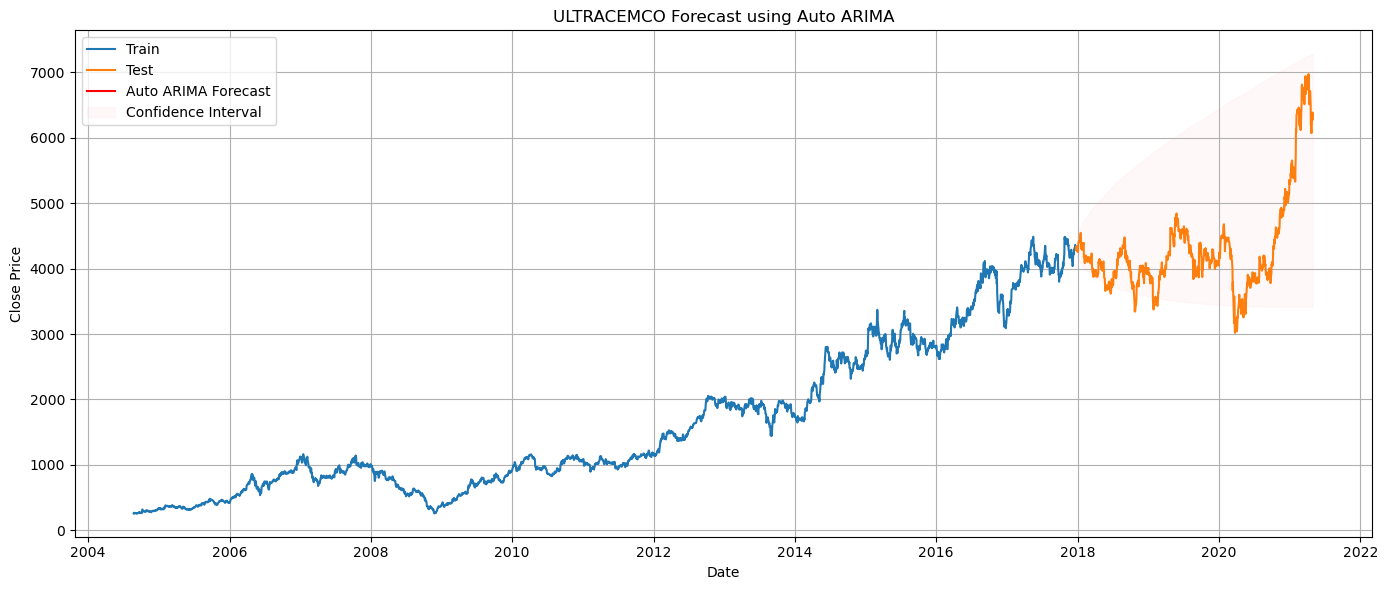

In [49]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='Auto ARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using Auto ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### SERIMA MODEL BY EVERY SYMBOLS(ADANIPORTS,MUNDRAPORT,TCS,ULTRACEMCO)


In [50]:
## MUNDRAPORT
symbol = 'MUNDRAPORT'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [51]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [52]:
# Fit Auto ARIMA model
model_4 = auto_arima(
        train,
        start_p=0, start_q=0,
        max_p=5, max_q=5,
        m=12,  # Monthly seasonality (adjust if needed, e.g., 7 for weekly, 252 for daily trading days)
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        seasonal=True,  # Enable SARIMA
        d=None,  # Let auto_arima determine differencing
        D=None,  # Let auto_arima determine seasonal differencing
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7931.237, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7933.163, Time=1.51 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7933.215, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7930.119, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=7933.226, Time=0.43 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=7933.226, Time=0.25 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=7935.228, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=7931.176, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=7931.227, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=7933.057, Time=0.67 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 4.967 seconds


In [53]:
print(f"\nSARIMA model summary for {symbol}:")
print(model_4.summary())


SARIMA model summary for MUNDRAPORT:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  818
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3964.060
Date:                Wed, 09 Jul 2025   AIC                           7930.119
Time:                        23:08:26   BIC                           7934.825
Sample:                             0   HQIC                          7931.925
                                - 818                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       959.1674      4.070    235.673      0.000     951.191     967.144
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):           2482110.68
Prob(Q): 

In [54]:
# Forecast
forecast, conf_int = model_4.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
        'Forecast': forecast,
        'Lower_CI': conf_int[:, 0],
        'Upper_CI': conf_int[:, 1]
    }, index=test.index)

In [56]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'SARIMA RMSE for {symbol}: {rmse}')

SARIMA RMSE for MUNDRAPORT: 18.557025492302124


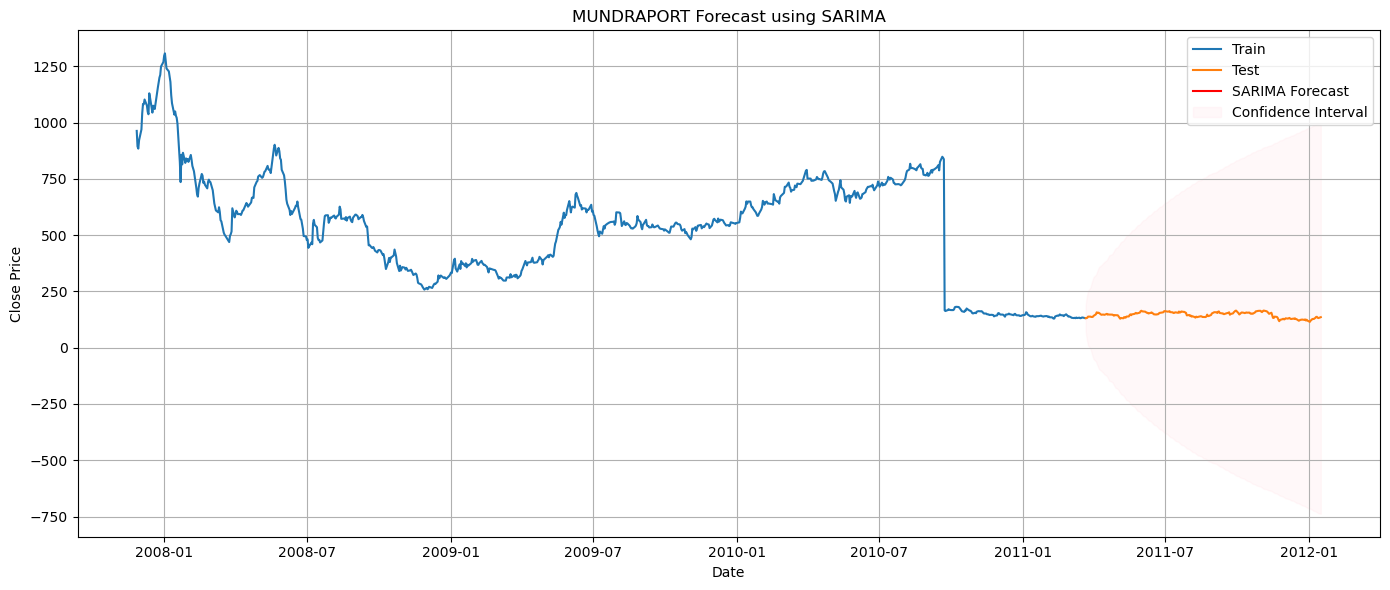

In [57]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='SARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], 
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
## ADANIPORTS
symbol = 'ADANIPORTS'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [59]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [60]:
# Fit Auto ARIMA model
model_5 = auto_arima(
        train,
        start_p=0, start_q=0,
        max_p=5, max_q=5,
        m=12,  # Monthly seasonality (adjust if needed, e.g., 7 for weekly, 252 for daily trading days)
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        seasonal=True,  # Enable SARIMA
        d=None,  # Let auto_arima determine differencing
        D=None,  # Let auto_arima determine seasonal differencing
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11904.554, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11901.739, Time=1.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11901.779, Time=1.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11903.538, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=11901.345, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=11901.694, Time=0.96 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=11903.561, Time=2.48 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=11903.241, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=11903.164, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=11901.427, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=11904.237, Time=3.29 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=11900.437, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=11900.764, Time=0.36 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=11900.720, Time=0.41 sec
 ARIM

In [61]:
print(f"\nSARIMA model summary for {symbol}:")
print(model_5.summary())


SARIMA model summary for ADANIPORTS:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1839
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -5948.219
Date:                Wed, 09 Jul 2025   AIC                          11900.437
Time:                        23:08:42   BIC                          11911.470
Sample:                             0   HQIC                         11904.506
                               - 1839                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0526      0.019     -2.809      0.005      -0.089      -0.016
sigma2        37.8871      0.669     56.643      0.000      36.576      39.198
Ljung-Box (L1)

In [62]:
# Forecast
forecast, conf_int = model_5.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [63]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
        'Forecast': forecast,
        'Lower_CI': conf_int[:, 0],
        'Upper_CI': conf_int[:, 1]
    }, index=test.index)

In [64]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'SARIMA RMSE for {symbol}: {rmse}')

SARIMA RMSE for ADANIPORTS: 126.0053635486031


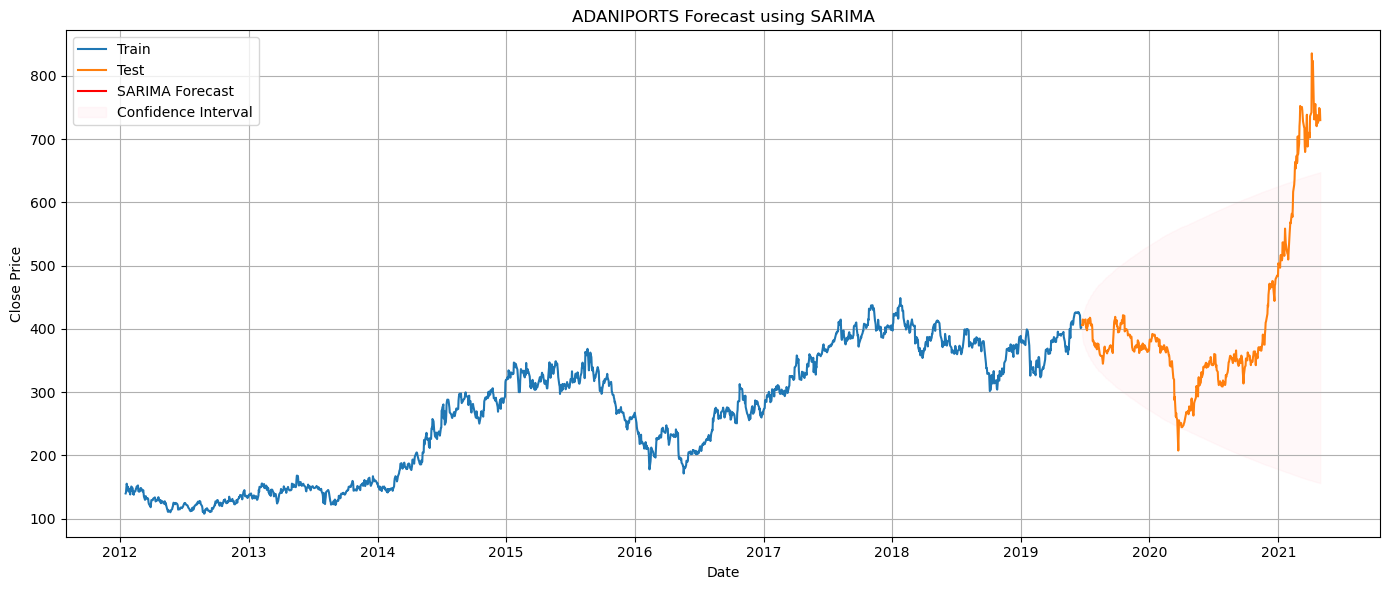

In [65]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='SARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], 
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
## TCS
symbol = 'TCS'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [67]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [68]:
# Fit Auto ARIMA model
model_6 = auto_arima(
        train,
        start_p=0, start_q=0,
        max_p=5, max_q=5,
        m=12,  # Monthly seasonality (adjust if needed, e.g., 7 for weekly, 252 for daily trading days)
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        seasonal=True,  # Enable SARIMA
        d=None,  # Let auto_arima determine differencing
        D=None,  # Let auto_arima determine seasonal differencing
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=32457.973, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=32458.879, Time=5.63 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=32458.960, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=32456.709, Time=0.07 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=32457.003, Time=2.70 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=32457.084, Time=0.91 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=32457.351, Time=5.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=32459.864, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=32459.860, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=32455.136, Time=3.50 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=32460.876, Time=2.92 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=32455.195, Time=10.47 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=32455.213, Time=14.55 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=32448.978, Time=5.60 sec
 AR

In [69]:
print(f"\nSARIMA model summary for {symbol}:")
print(model_6.summary())


SARIMA model summary for TCS:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3311
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -16217.487
Date:                Wed, 09 Jul 2025   AIC                          32444.974
Time:                        23:12:18   BIC                          32475.497
Sample:                             0   HQIC                         32455.898
                               - 3311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0167      0.079      0.210      0.834      -0.139       0.172
ar.L2          0.8129      0.068     11.885      0.000       0.679       0.947
ma.L1         -0.0201

In [70]:
# Forecast
forecast, conf_int = model_6.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [71]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
        'Forecast': forecast,
        'Lower_CI': conf_int[:, 0],
        'Upper_CI': conf_int[:, 1]
    }, index=test.index)

In [72]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'SARIMA RMSE for {symbol}: {rmse}')

SARIMA RMSE for TCS: 537.7254429481313


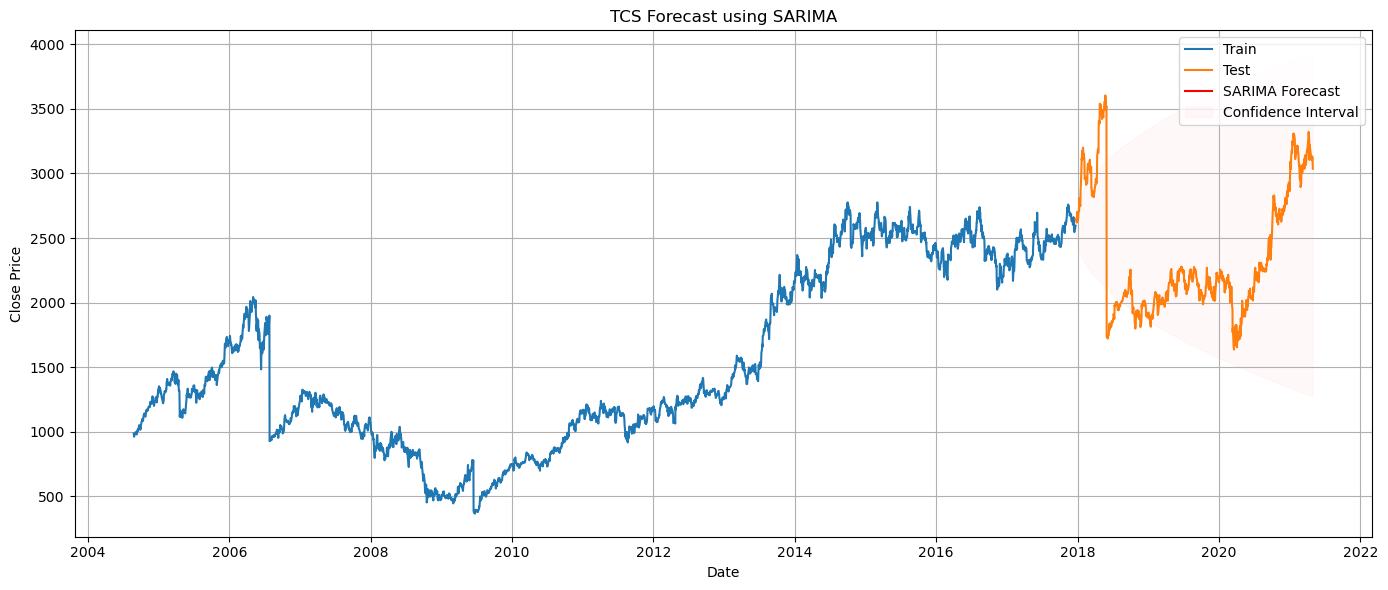

In [73]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='SARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], 
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
## ULTRACEMCO
symbol = 'ULTRACEMCO'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [75]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [76]:
# Fit Auto ARIMA model
model_7 = auto_arima(
        train,
        start_p=0, start_q=0,
        max_p=5, max_q=5,
        m=12,  # Monthly seasonality (adjust if needed, e.g., 7 for weekly, 252 for daily trading days)
        start_P=0, start_Q=0,
        max_P=2, max_Q=2,
        seasonal=True,  # Enable SARIMA
        d=None,  # Let auto_arima determine differencing
        D=None,  # Let auto_arima determine seasonal differencing
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=32552.964, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=32546.026, Time=8.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=32546.206, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=32555.563, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=32550.016, Time=0.22 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=32548.019, Time=16.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=32548.040, Time=4.42 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=32546.042, Time=1.12 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=32550.033, Time=19.74 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=32549.400, Time=4.01 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=32547.346, Time=10.43 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=32547.295, Time=11.97 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=32546.190, Time=5.59 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=32549.229, Time=18.56 sec


In [77]:
print(f"\nSARIMA model summary for {symbol}:")
print(model_7.summary())


SARIMA model summary for ULTRACEMCO:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 3312
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood              -16269.013
Date:                            Wed, 09 Jul 2025   AIC                          32546.026
Time:                                    23:14:01   BIC                          32570.446
Sample:                                         0   HQIC                         32554.766
                                           - 3312                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1474      0.574      1.998      0.046       0.022       2.2

In [78]:
# Forecast
forecast, conf_int = model_7.predict(n_periods=len(test), return_conf_int=True)

C:\Users\sagni\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [79]:
# Create forecast DataFrame
forecast_df = pd.DataFrame({
        'Forecast': forecast,
        'Lower_CI': conf_int[:, 0],
        'Upper_CI': conf_int[:, 1]
    }, index=test.index)

In [80]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'SARIMA RMSE for {symbol}: {rmse}')

SARIMA RMSE for ULTRACEMCO: 854.5628237590735


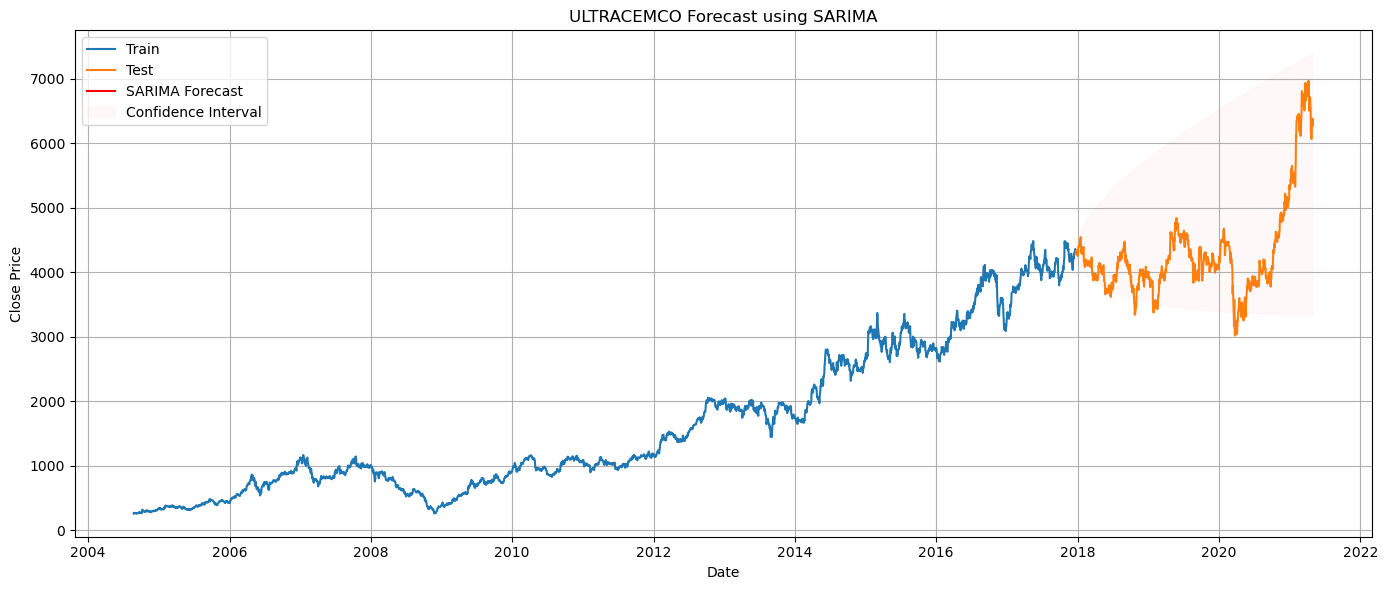

In [81]:
# Plot results
plt.figure(figsize=(14, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_df['Forecast'], label='SARIMA Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], 
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Prophet 


In [82]:
!pip install prophet

In [83]:
from prophet import Prophet

In [84]:
## MUNDRAPORT
symbol = 'MUNDRAPORT'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [85]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [86]:
df_prophet = df_symbol.reset_index().rename(columns={df_symbol.index.name: 'ds', 'Close': 'y'})
print(f"\nPreview of {symbol} data for Prophet:")
print(df_prophet.head())


Preview of MUNDRAPORT data for Prophet:
          ds      Symbol    Open     High    Low       y    Volume
0 2007-11-27  MUNDRAPORT  770.00  1050.00  770.0  962.90  27294366
1 2007-11-28  MUNDRAPORT  984.00   990.00  874.0  893.90   4581338
2 2007-11-29  MUNDRAPORT  909.00   914.75  841.0  884.20   5124121
3 2007-11-30  MUNDRAPORT  890.00   958.00  890.0  921.55   4609762
4 2007-12-03  MUNDRAPORT  939.75   995.00  922.0  969.30   2977470


In [87]:
# Split Prophet data into train and test
train_prophet = df_prophet[:train_size]
test_prophet = df_prophet[train_size:]

In [88]:
model_8 = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative'  # Suitable for stock prices
    )
    

In [89]:
model_8.fit(train_prophet)

23:14:06 - cmdstanpy - INFO - Chain [1] start processing
23:14:07 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
# Create future DataFrame for forecasting
future = model_8.make_future_dataframe(periods=len(test_prophet))

In [91]:
# Forecast
forecast = model_8.predict(future)

In [92]:
# Extract forecast for test period
forecast_test = forecast.tail(len(test_prophet))

In [93]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
print(f'Prophet RMSE for {symbol}: {rmse}')

Prophet RMSE for MUNDRAPORT: 283.6068889339672


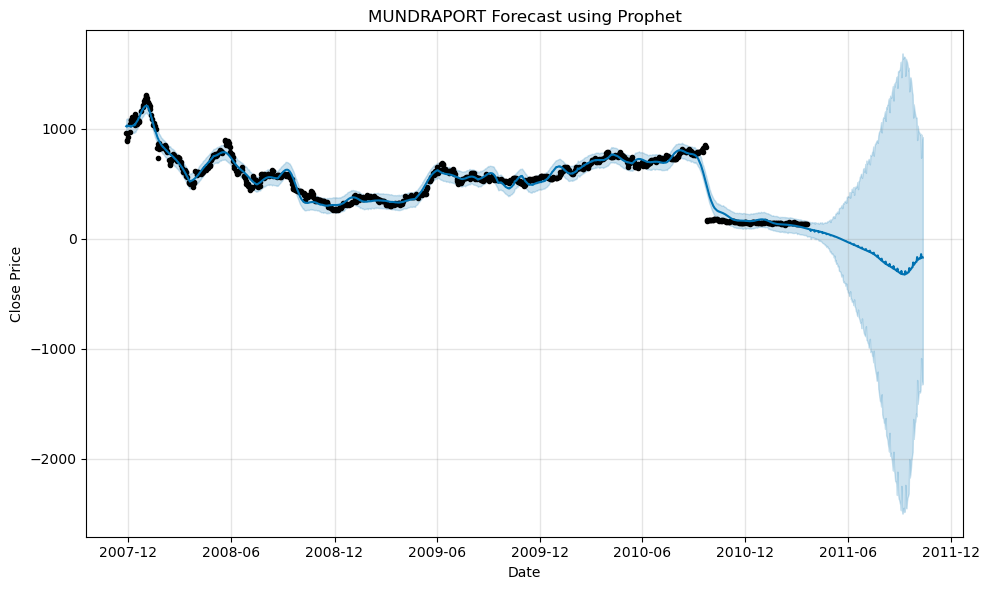

In [94]:
# Plot forecast
fig = model_8.plot(forecast)
plt.title(f'{symbol} Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

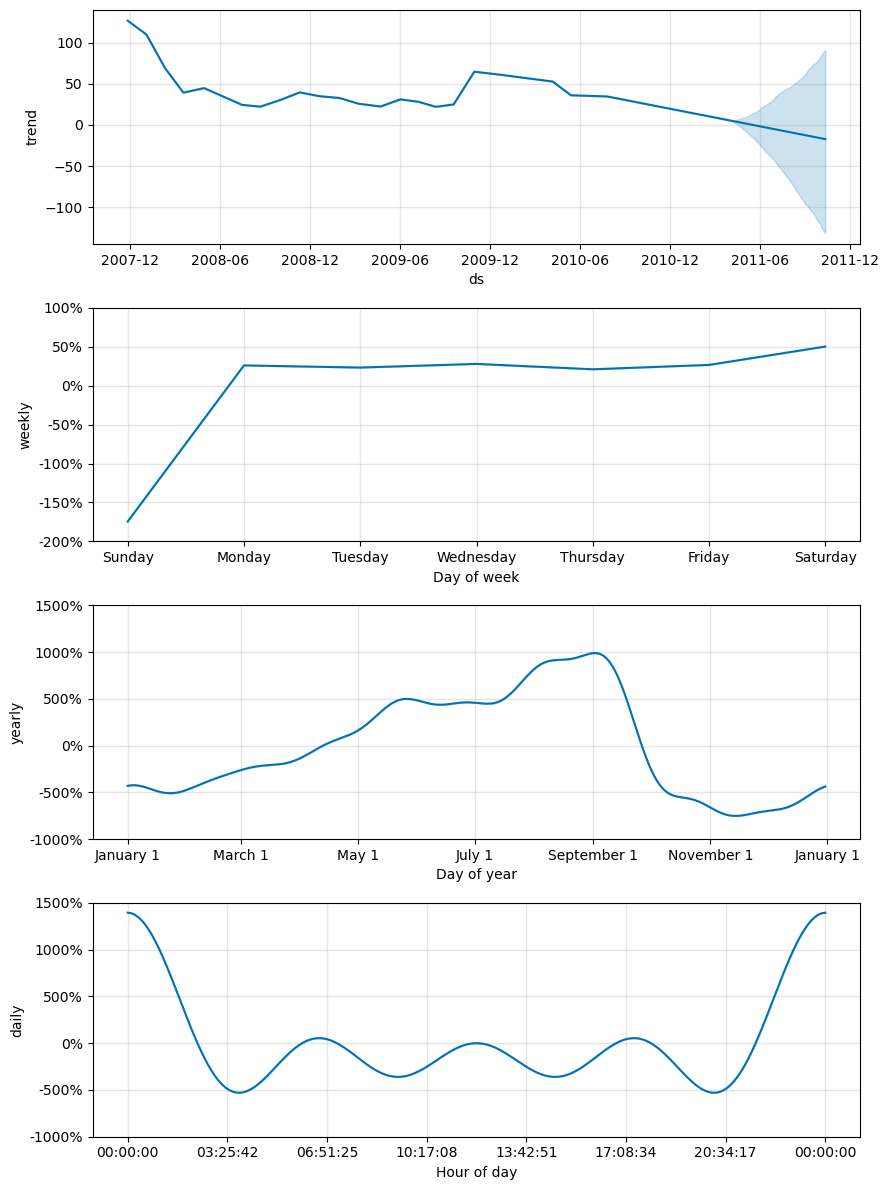

In [95]:
# Plot components (trend, yearly, weekly, daily seasonality)
fig2 = model_8.plot_components(forecast)
plt.show()

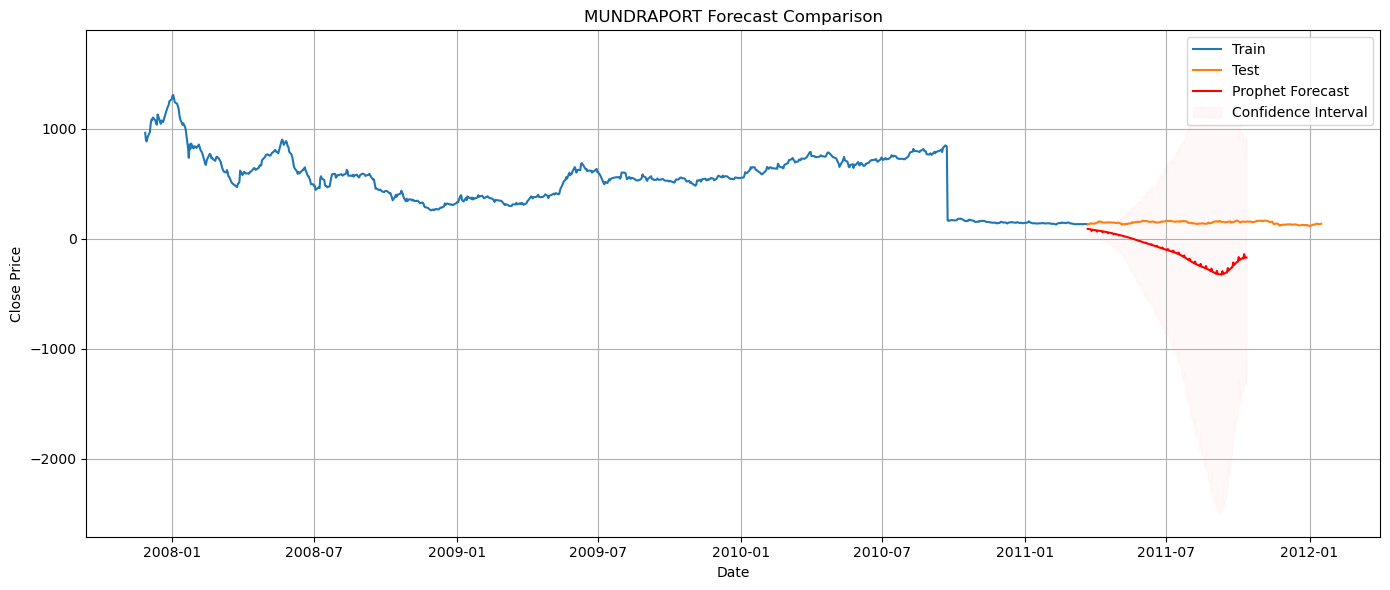

In [96]:
# Detailed comparison plot
plt.figure(figsize=(14, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'],
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
## ADANIPORTS
symbol = 'ADANIPORTS'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [98]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [99]:
df_prophet = df_symbol.reset_index().rename(columns={df_symbol.index.name: 'ds', 'Close': 'y'})
print(f"\nPreview of {symbol} data for Prophet:")
print(df_prophet.head())


Preview of ADANIPORTS data for Prophet:
          ds      Symbol   Open    High     Low       y   Volume
0 2012-01-17  ADANIPORTS  137.1  141.00  135.00  140.00  1636196
1 2012-01-18  ADANIPORTS  142.0  143.80  138.70  141.70   890591
2 2012-01-19  ADANIPORTS  144.0  150.55  143.15  149.40  1456077
3 2012-01-20  ADANIPORTS  151.9  157.60  150.25  155.40  1634070
4 2012-01-23  ADANIPORTS  155.4  155.40  145.10  146.75  1657609


In [100]:
# Split Prophet data into train and test
train_prophet = df_prophet[:train_size]
test_prophet = df_prophet[train_size:]

In [101]:
model_9 = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative'  # Suitable for stock prices
    )

In [102]:
model_9.fit(train_prophet)

23:14:10 - cmdstanpy - INFO - Chain [1] start processing
23:14:11 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
# Create future DataFrame for forecasting
future = model_9.make_future_dataframe(periods=len(test_prophet))

In [104]:
# Forecast
forecast = model_9.predict(future)

In [105]:
# Extract forecast for test period
forecast_test = forecast.tail(len(test_prophet))

In [106]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
print(f'Prophet RMSE for {symbol}: {rmse}')

Prophet RMSE for ADANIPORTS: 147.5872441756839


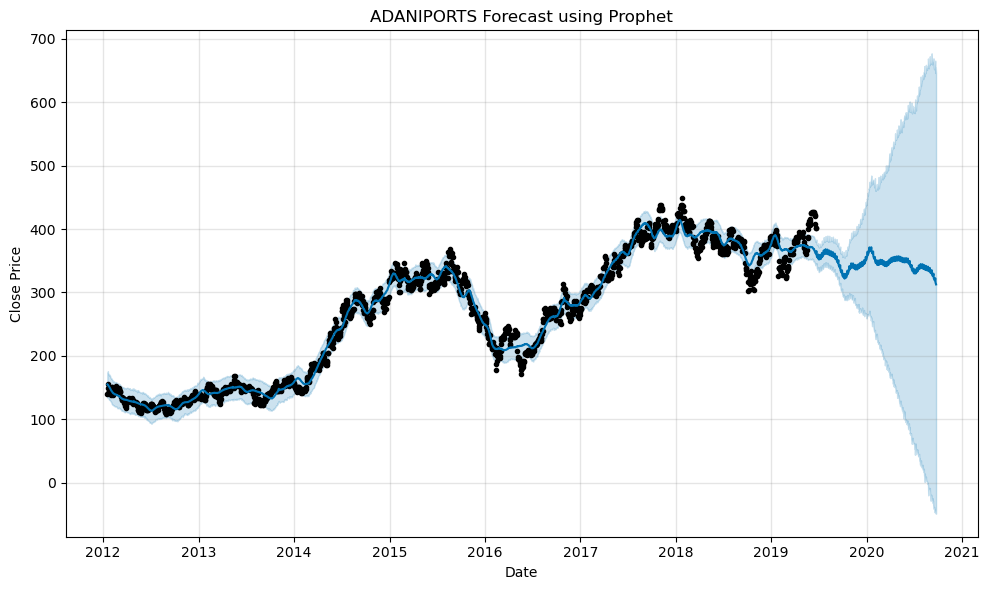

In [107]:
# Plot forecast
fig = model_9.plot(forecast)
plt.title(f'{symbol} Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

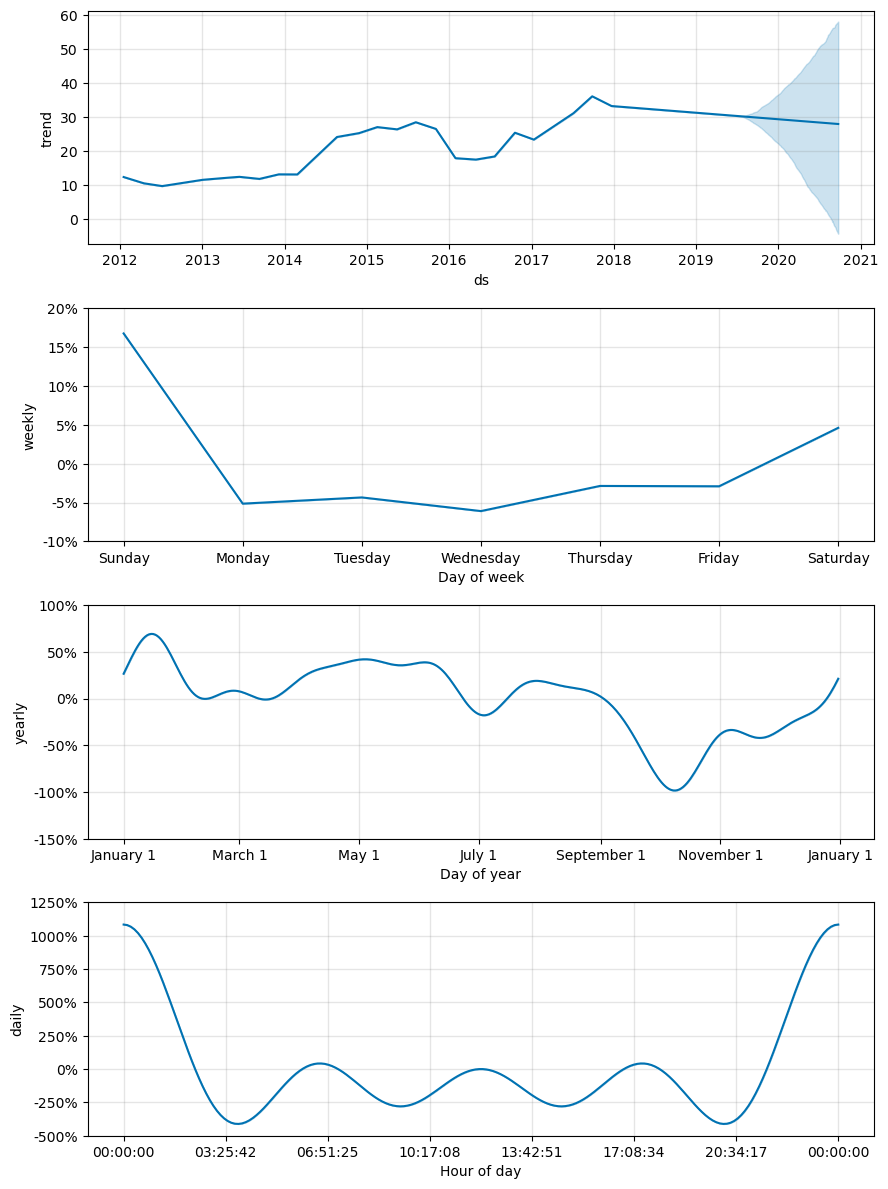

In [108]:
# Plot components (trend, yearly, weekly, daily seasonality)
fig2 = model_9.plot_components(forecast)
plt.show()

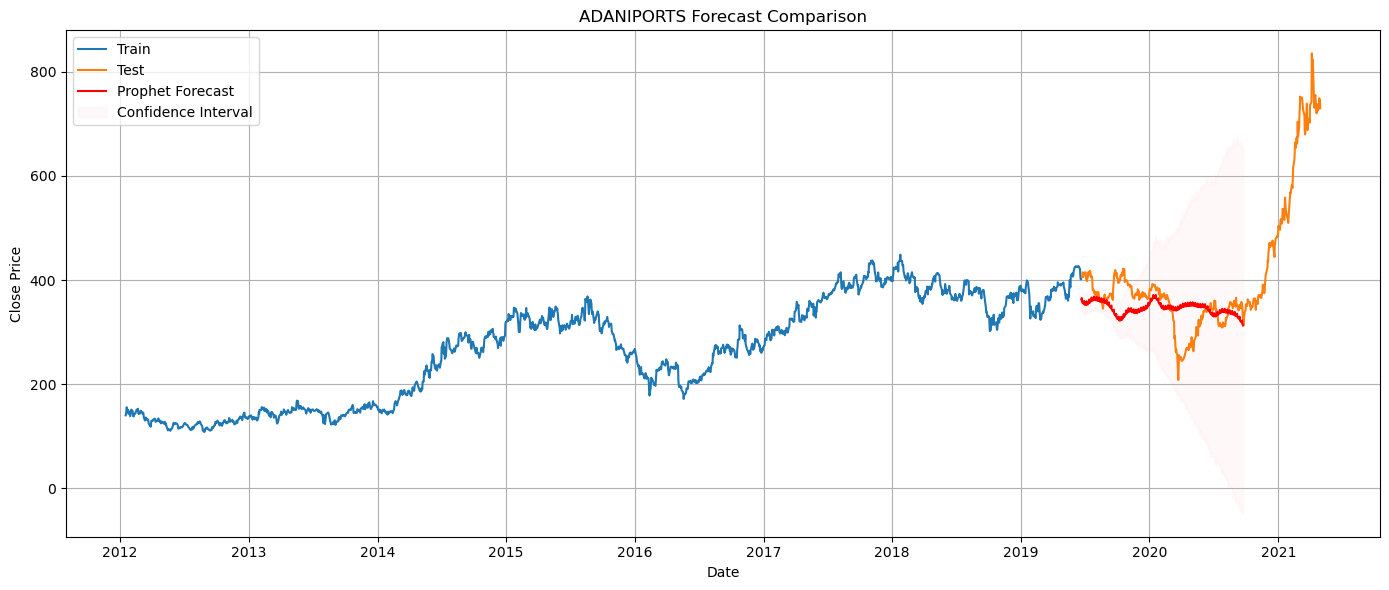

In [109]:
# Detailed comparison plot
plt.figure(figsize=(14, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'],
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
## TCS
symbol = 'TCS'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [111]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [112]:
df_prophet = df_symbol.reset_index().rename(columns={df_symbol.index.name: 'ds', 'Close': 'y'})
print(f"\nPreview of {symbol} data for Prophet:")
print(df_prophet.head())


Preview of TCS data for Prophet:
          ds Symbol    Open    High     Low       y    Volume
0 2004-08-25    TCS  1198.7  1198.7  979.00  987.95  17116372
1 2004-08-26    TCS   992.0   997.0  975.30  979.00   5055400
2 2004-08-27    TCS   982.4   982.4  958.55  962.65   3830750
3 2004-08-30    TCS   969.9   990.0  965.00  986.75   3058151
4 2004-08-31    TCS   986.5   990.0  976.00  988.10   2649332


In [113]:
# Split Prophet data into train and test
train_prophet = df_prophet[:train_size]
test_prophet = df_prophet[train_size:]

In [114]:
model_10 = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative'  # Suitable for stock prices
    )

In [115]:
model_10.fit(train_prophet)

23:14:15 - cmdstanpy - INFO - Chain [1] start processing
23:14:17 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
# Create future DataFrame for forecasting
future = model_10.make_future_dataframe(periods=len(test_prophet))

In [117]:
# Forecast
forecast = model_10.predict(future)

In [118]:
# Extract forecast for test period
forecast_test = forecast.tail(len(test_prophet))

In [119]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
print(f'Prophet RMSE for {symbol}: {rmse}')

Prophet RMSE for TCS: 511.6412486553098


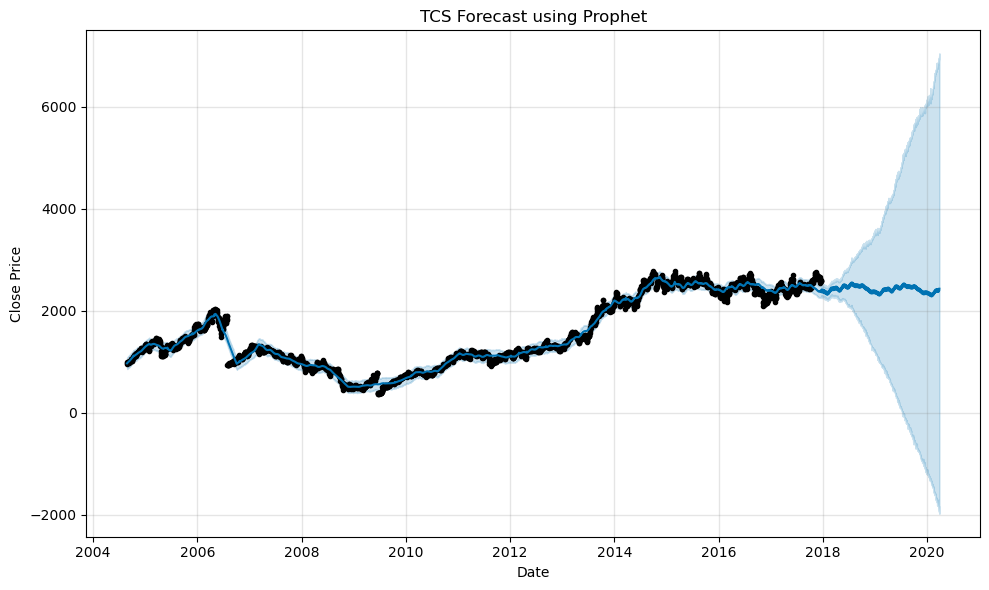

In [120]:
# Plot forecast
fig = model_10.plot(forecast)
plt.title(f'{symbol} Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

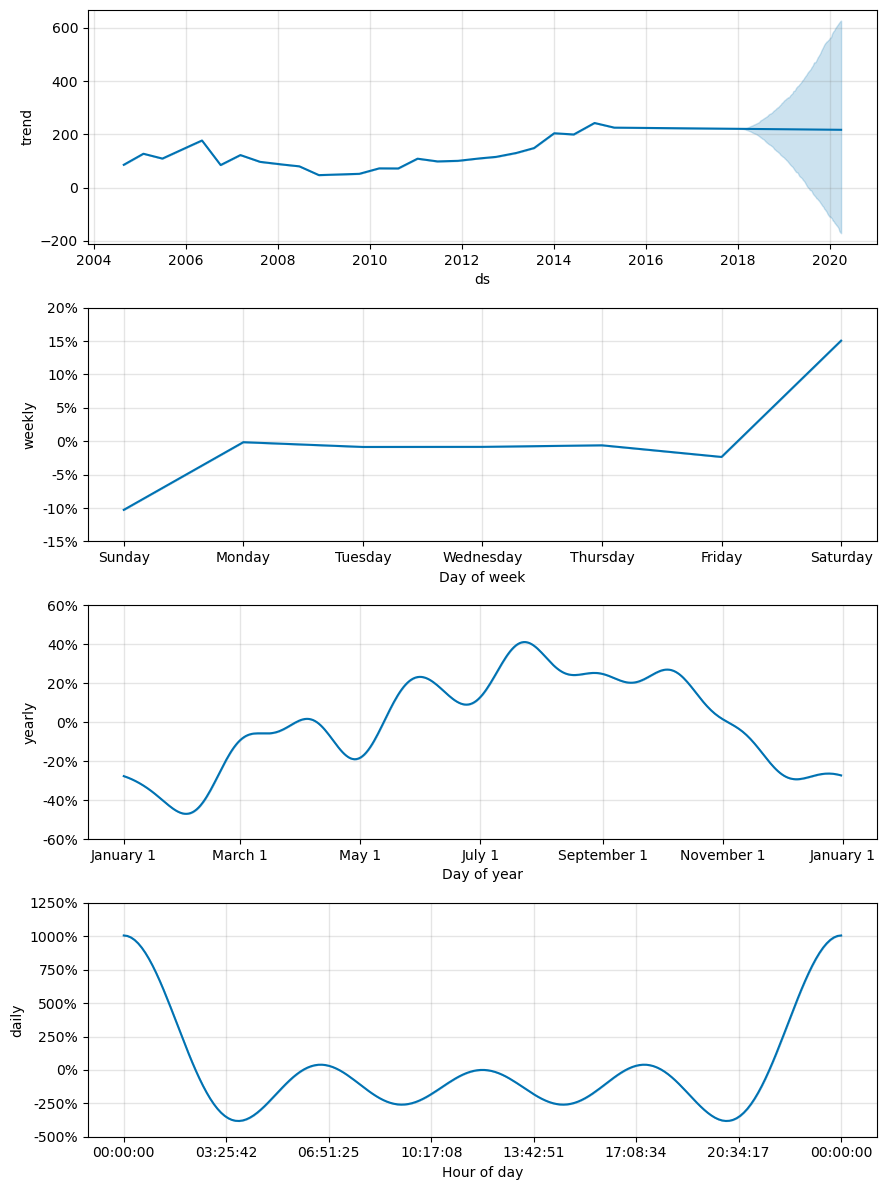

In [121]:
# Plot components (trend, yearly, weekly, daily seasonality)
fig2 = model_10.plot_components(forecast)
plt.show()

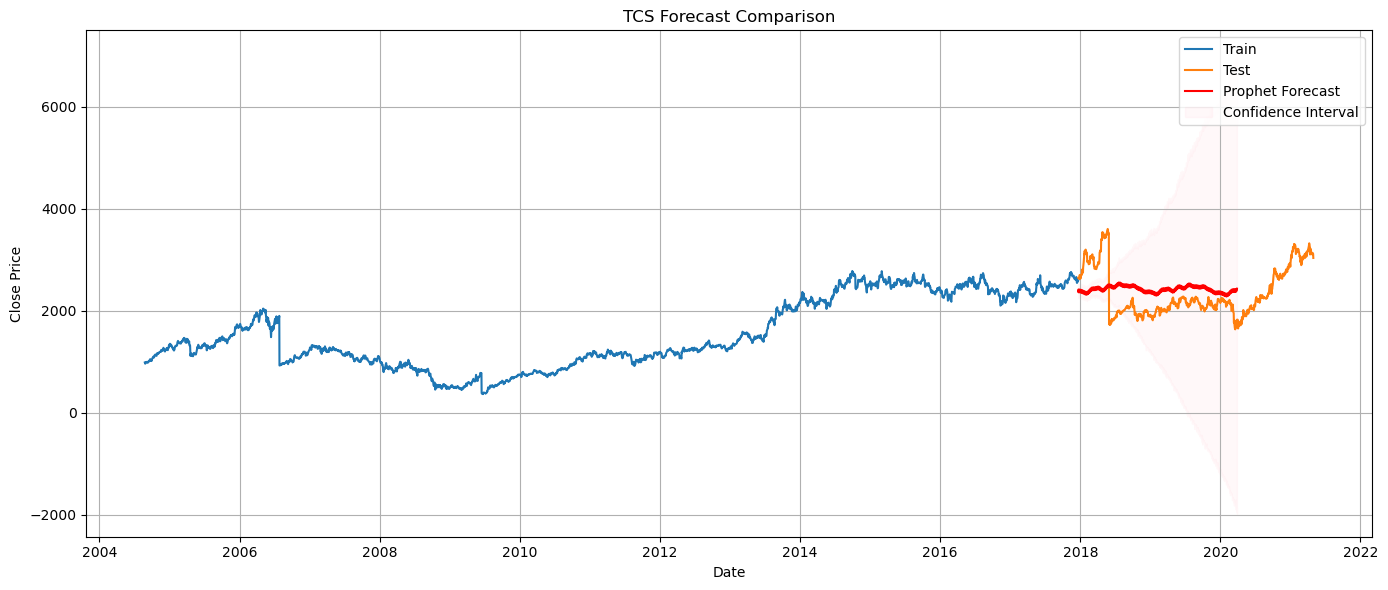

In [122]:
# Detailed comparison plot
plt.figure(figsize=(14, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'],
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [123]:
## ULTRACEMCO
symbol = 'ULTRACEMCO'
df_symbol = df[df['Symbol'] == symbol].copy()
if 'Date' in df_symbol.columns:
    df_symbol.sort_values('Date', inplace=True)
    df_symbol.set_index('Date', inplace=True)
else:
    df_symbol.sort_index(inplace=True)

In [124]:
train_size = int(len(df_symbol) * 0.8)
train = df_symbol['Close'][:train_size]
test = df_symbol['Close'][train_size:]

In [125]:
df_prophet = df_symbol.reset_index().rename(columns={df_symbol.index.name: 'ds', 'Close': 'y'})
print(f"\nPreview of {symbol} data for Prophet:")
print(df_prophet.head())


Preview of ULTRACEMCO data for Prophet:
          ds      Symbol    Open    High     Low       y   Volume
0 2004-08-24  ULTRACEMCO  305.00  340.00  253.25  260.20  6633956
1 2004-08-25  ULTRACEMCO  262.00  264.70  249.20  255.55  2794161
2 2004-08-26  ULTRACEMCO  257.75  272.50  256.00  270.70  2340926
3 2004-08-27  ULTRACEMCO  272.00  272.55  260.65  262.25   915106
4 2004-08-30  ULTRACEMCO  263.70  269.00  262.05  266.10   387417


In [126]:
# Split Prophet data into train and test
train_prophet = df_prophet[:train_size]
test_prophet = df_prophet[train_size:]

In [127]:
model_11 = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative'  # Suitable for stock prices
    )

In [128]:
model_11.fit(train_prophet)

23:14:22 - cmdstanpy - INFO - Chain [1] start processing
23:14:25 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
# Create future DataFrame for forecasting
future = model_11.make_future_dataframe(periods=len(test_prophet))

In [130]:
# Forecast
forecast = model_11.predict(future)

In [131]:
# Extract forecast for test period
forecast_test = forecast.tail(len(test_prophet))

In [132]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_prophet['y'], forecast_test['yhat']))
print(f'Prophet RMSE for {symbol}: {rmse}')

Prophet RMSE for ULTRACEMCO: 1013.7899928451318


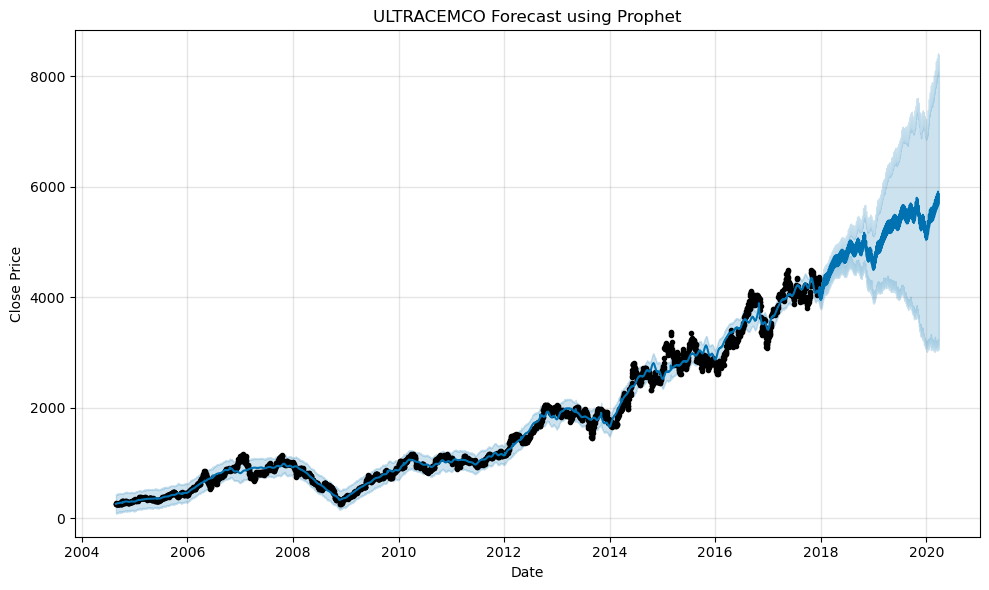

In [133]:
# Plot forecast
fig = model_11.plot(forecast)
plt.title(f'{symbol} Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

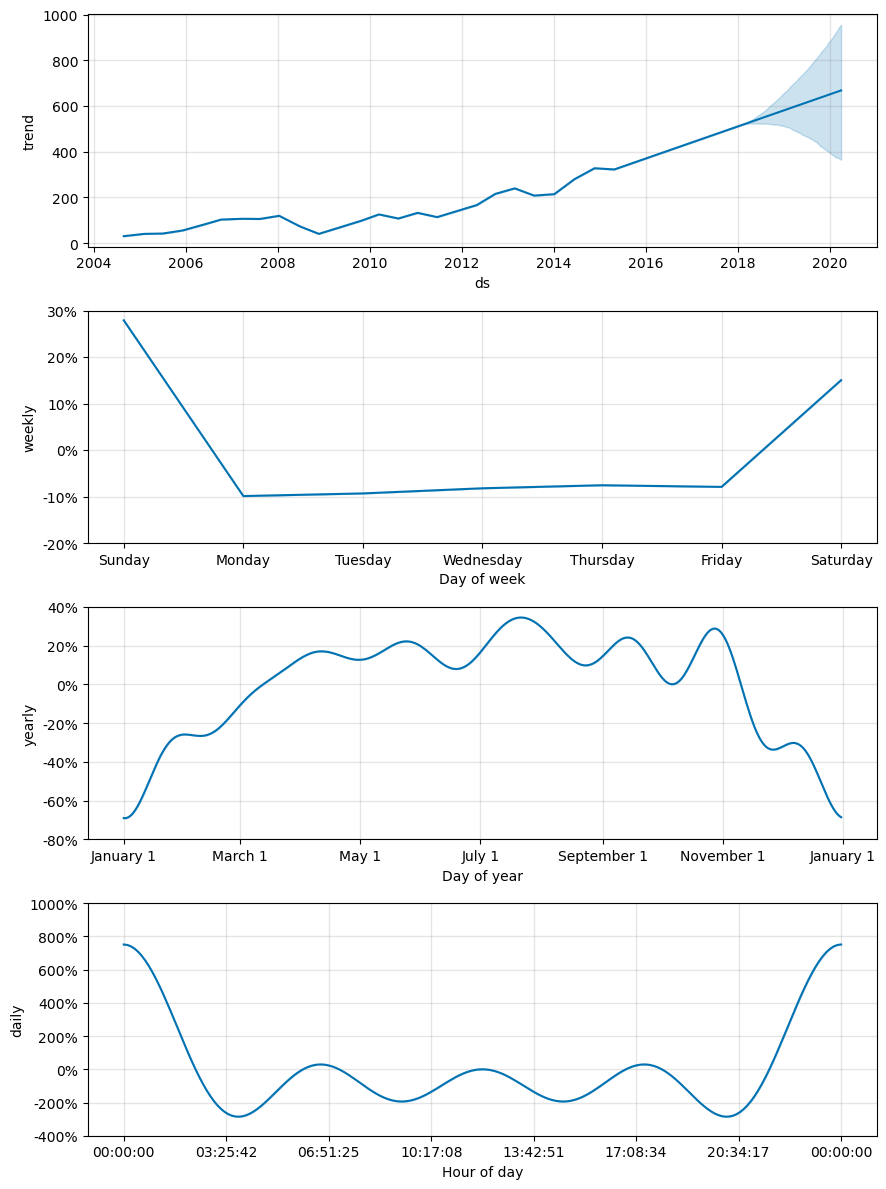

In [134]:
# Plot components (trend, yearly, weekly, daily seasonality)
fig2 = model_11.plot_components(forecast)
plt.show()

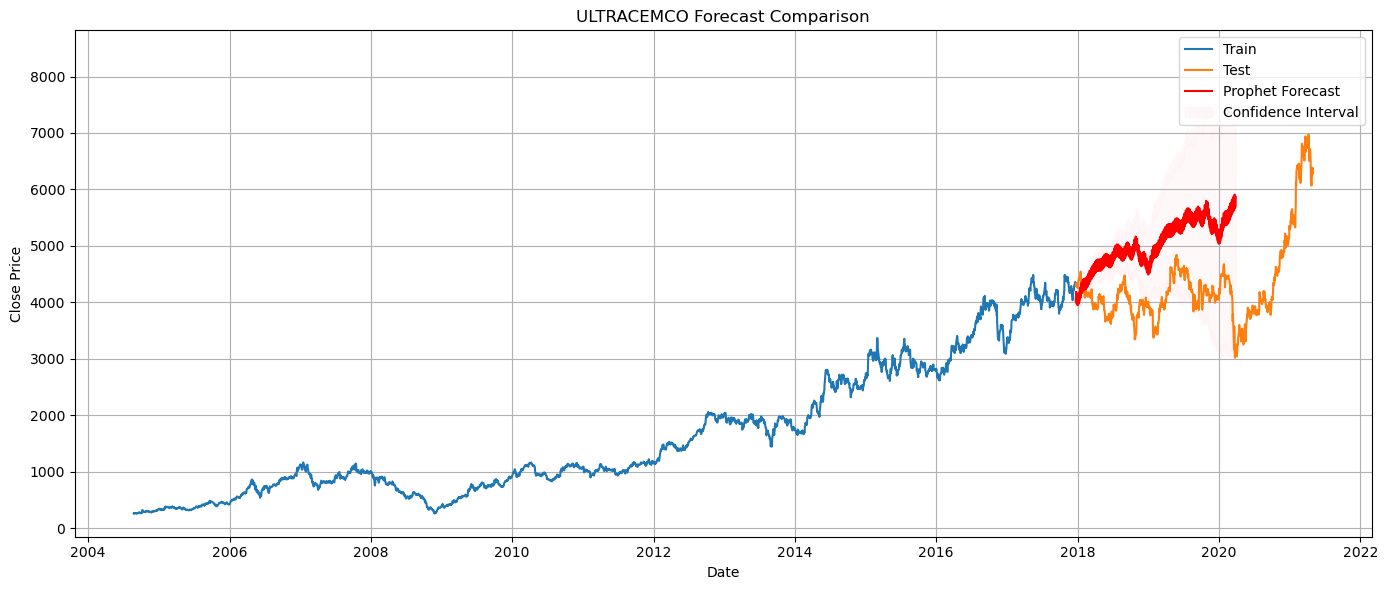

In [135]:
# Detailed comparison plot
plt.figure(figsize=(14, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Train')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Test')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Prophet Forecast', color='red')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'],
                     color='pink', alpha=0.1, label='Confidence Interval')
plt.title(f'{symbol} Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()